# scRNAseq_keloid_sampleKF3_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532330,28.5,1200052,64.1,641780,34.3
Vcells,991466,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_directory/cellRanger_wd/KF3/outs/filtered_feature_bc_matrix")

In [3]:
KF3.counts <- Read10X(data.dir = getwd())

In [4]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#170
dobultesIndex=dobultes[,1]>0
KF3.counts.noDoublet=KF3.counts[,!dobultesIndex]
dim(KF3.counts.noDoublet)

'data.frame':	8874 obs. of  1 variable:
 $ V1: num  0 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 170

[1] 33538  8704

In [5]:
KF3 <- CreateSeuratObject(counts = KF3.counts.noDoublet,project = "KF3", min.cells = 3, min.features = 200)

In [6]:
KF3

An object of class Seurat 
21192 features across 8174 samples within 1 assay 
Active assay: RNA (21192 features)

In [7]:
KF3[["percent.mt"]] <- PercentageFeatureSet(KF3, pattern = "^MT-")

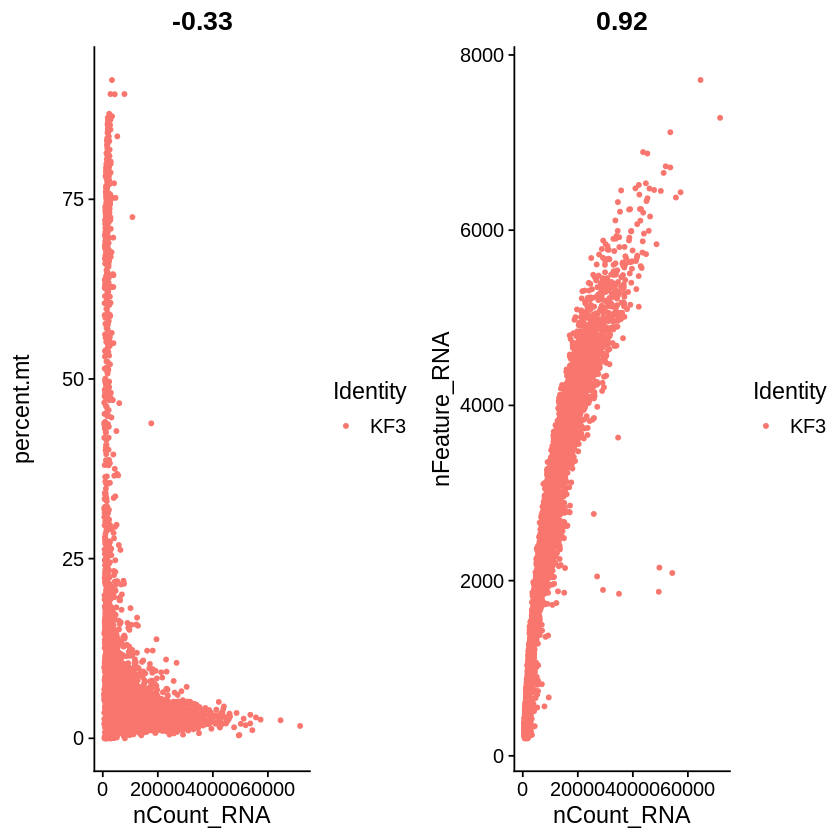

In [8]:
plot1 <- FeatureScatter(KF3, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(KF3, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [9]:
KF3 <- subset(KF3, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [10]:
KF3

An object of class Seurat 
21192 features across 6717 samples within 1 assay 
Active assay: RNA (21192 features)

In [11]:
KF3 <- NormalizeData(KF3, normalization.method = "LogNormalize", scale.factor = 10000)
KF3 <- FindVariableFeatures(KF3, selection.method = "vst", nfeatures = 2000)
KF3 <- ScaleData(KF3, verbose = FALSE)
KF3 <- RunPCA(KF3, npcs = 30, verbose = FALSE)
KF3 <- RunUMAP(KF3, reduction = "pca", dims = 1:15)
KF3 <- FindNeighbors(KF3, dims = 1:15)
KF3 <- FindClusters(KF3, resolution = 0.5)
KF3 <- RunTSNE(object = KF3, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”11:22:58 UMAP embedding parameters a = 0.9922 b = 1.112
11:22:58 Read 6717 rows and found 15 numeric columns
11:22:58 Using Annoy for neighbor search, n_neighbors = 30
11:22:58 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
11:22:59 Writing NN index file to temp file /tmp/Rtmp5bnS9w/file6b6803a4c710b
11:22:59 Searching Annoy index using 1 thread, search_k = 3000
11:23:02 Annoy recall = 100%
11:23:02 Commencing smooth kNN distance calibration using 1 thread
11:23:03 Initializing from normalized Laplacian + noise
11:23:04 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6717
Number of edges: 215583

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9080
Number of communities: 16
Elapsed time: 0 seconds



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

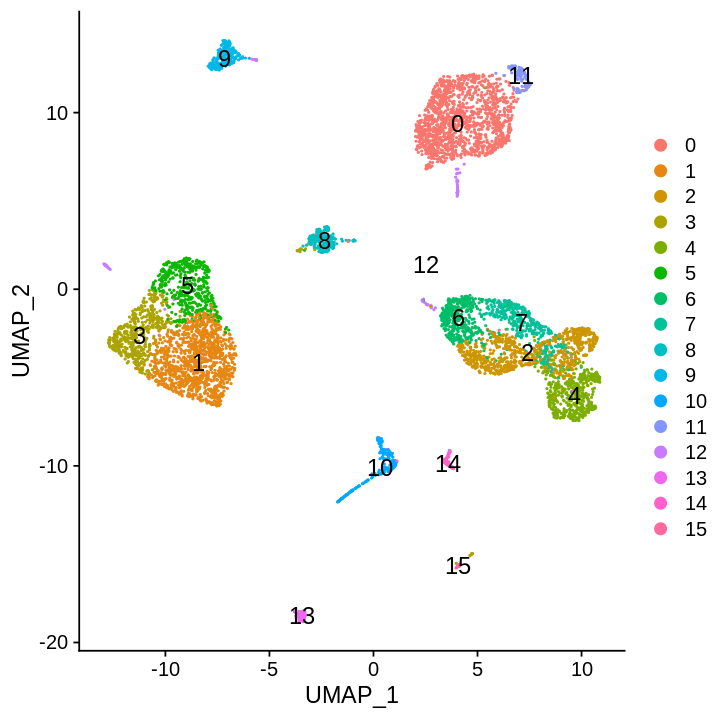

In [12]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(KF3, reduction = "umap",label = T,label.size = 5)

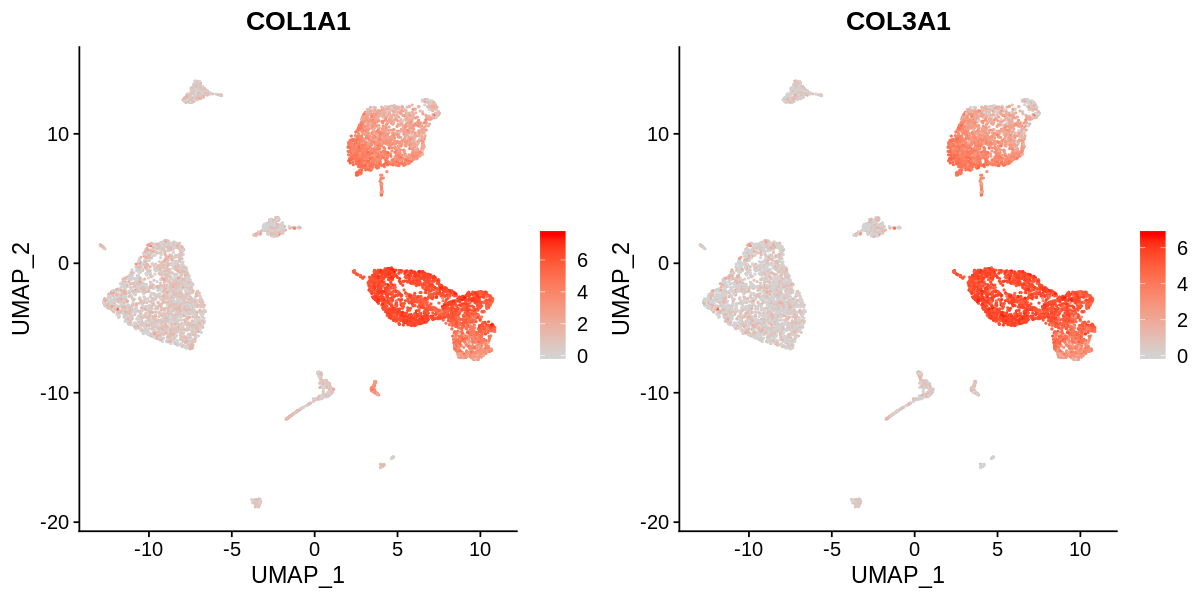

In [13]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF3, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

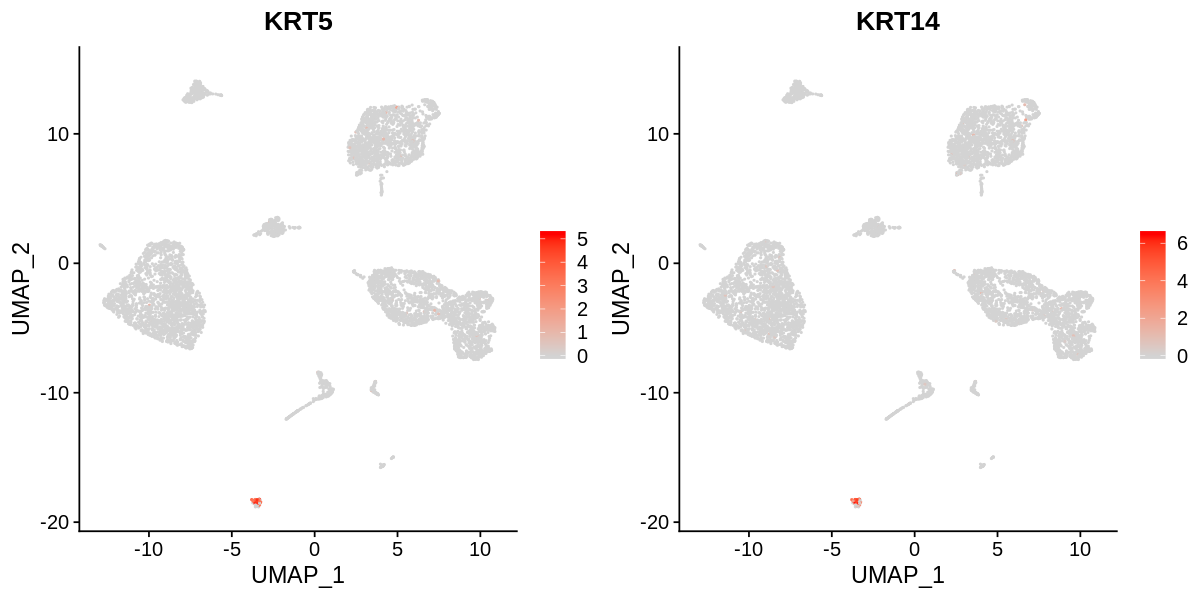

In [14]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF3, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

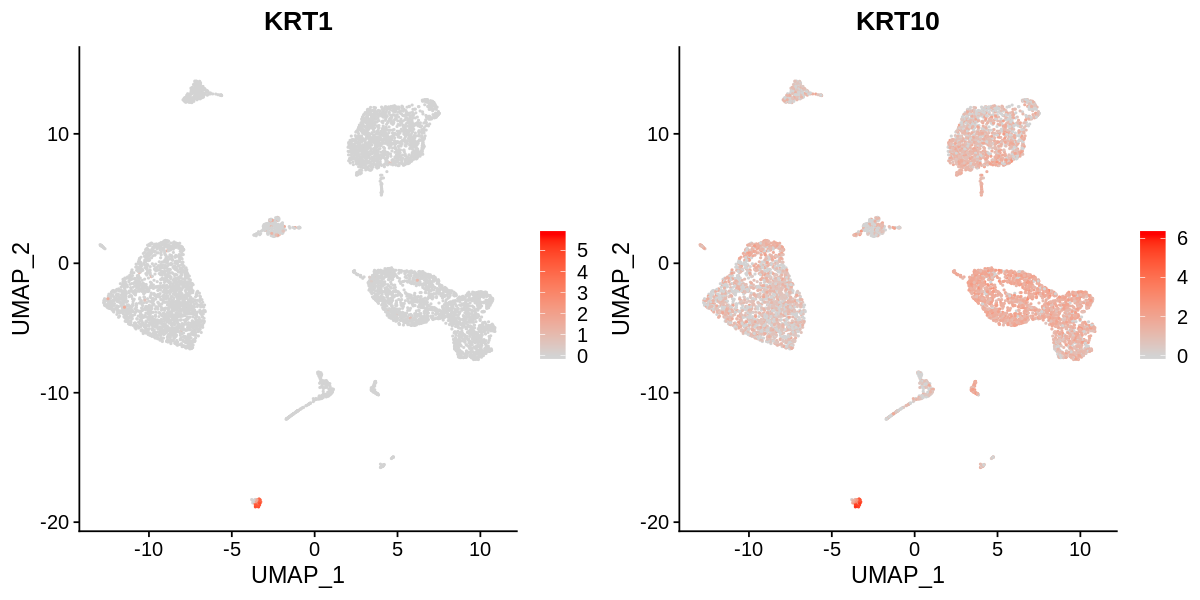

In [15]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF3, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: TYRP1”

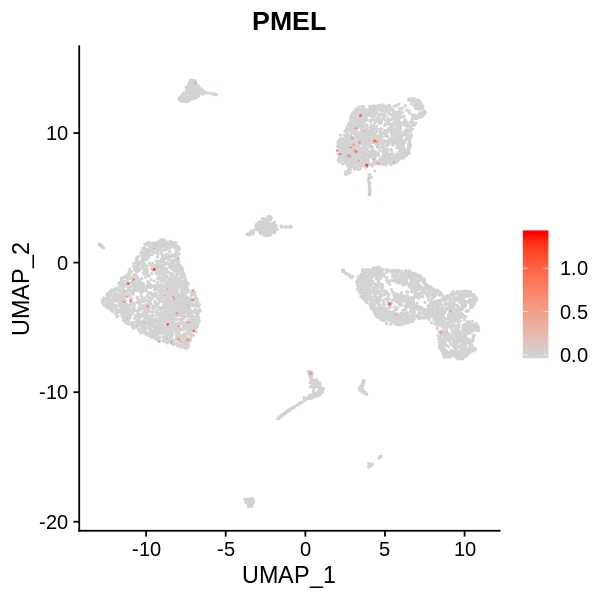

In [16]:
#Melanocytes
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(KF3, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

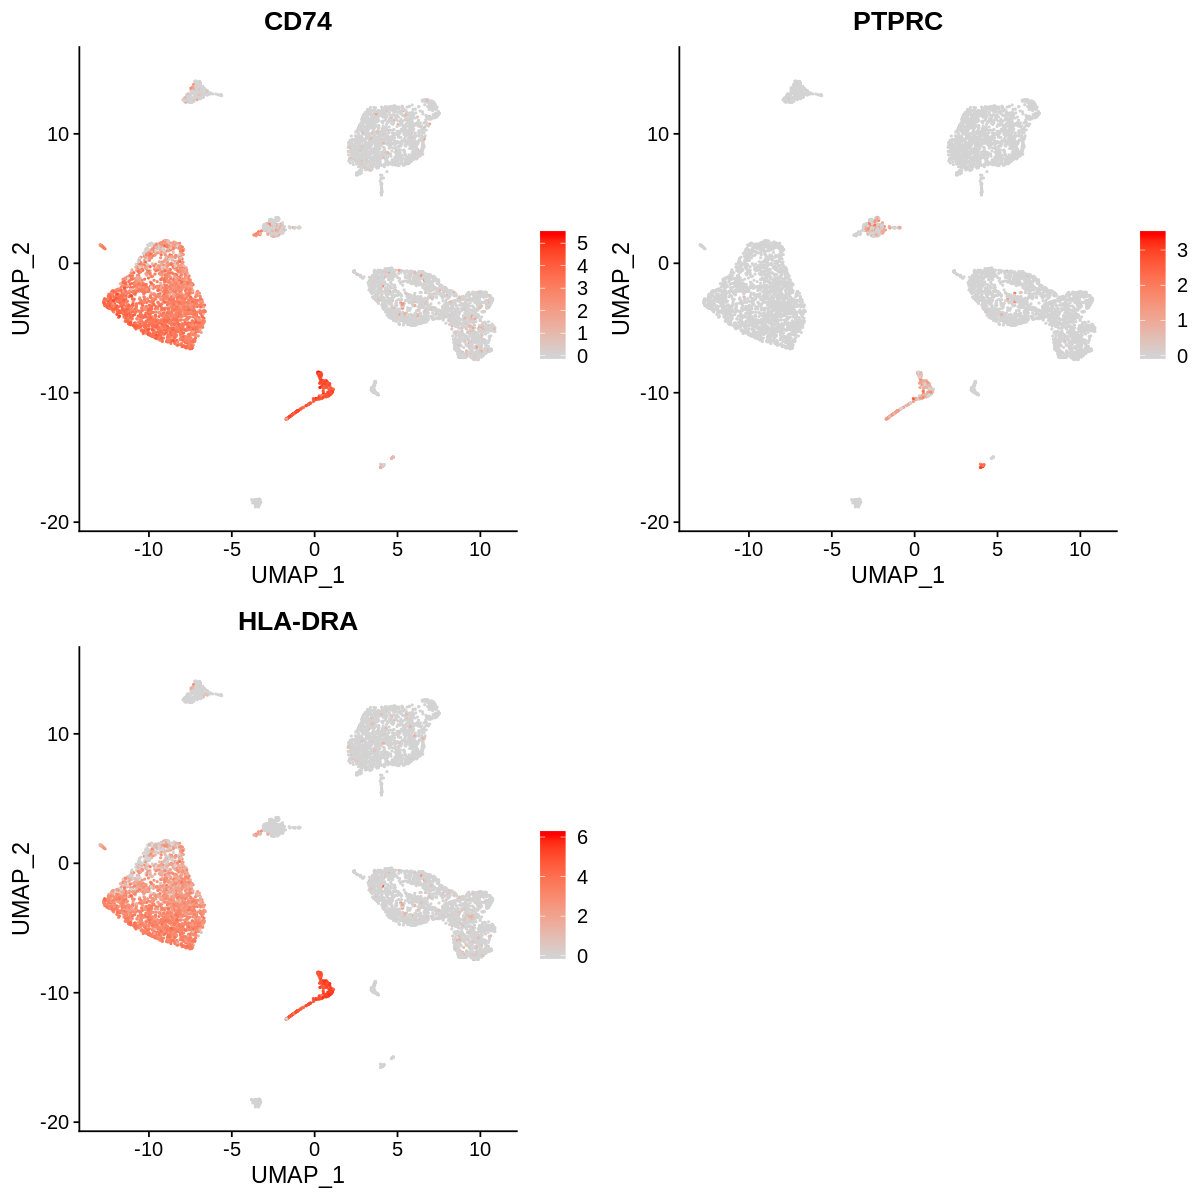

In [17]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

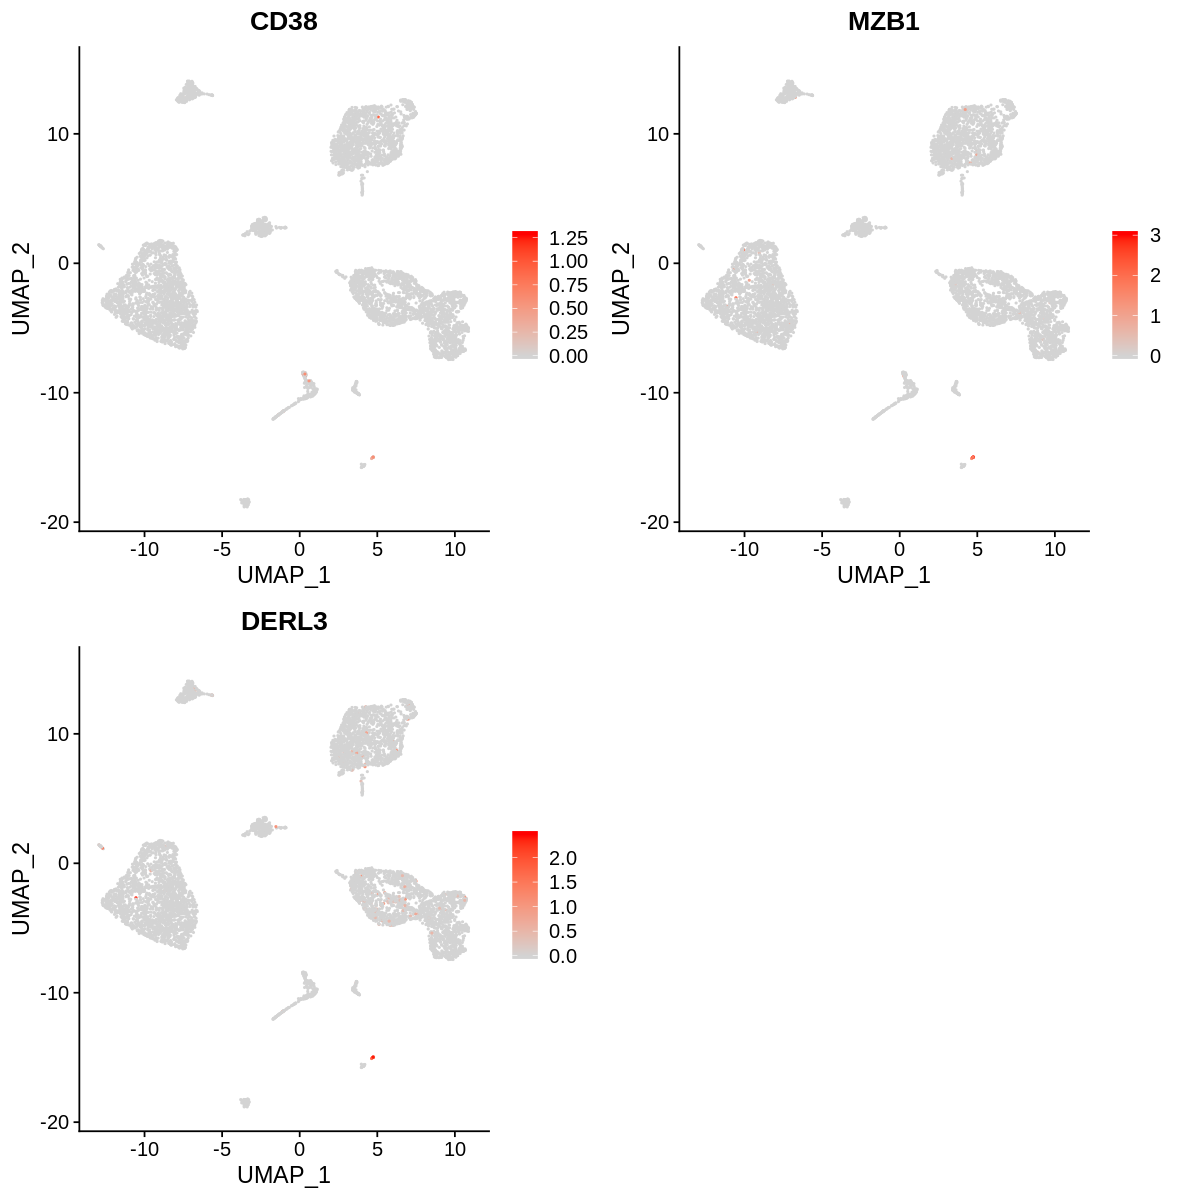

In [18]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

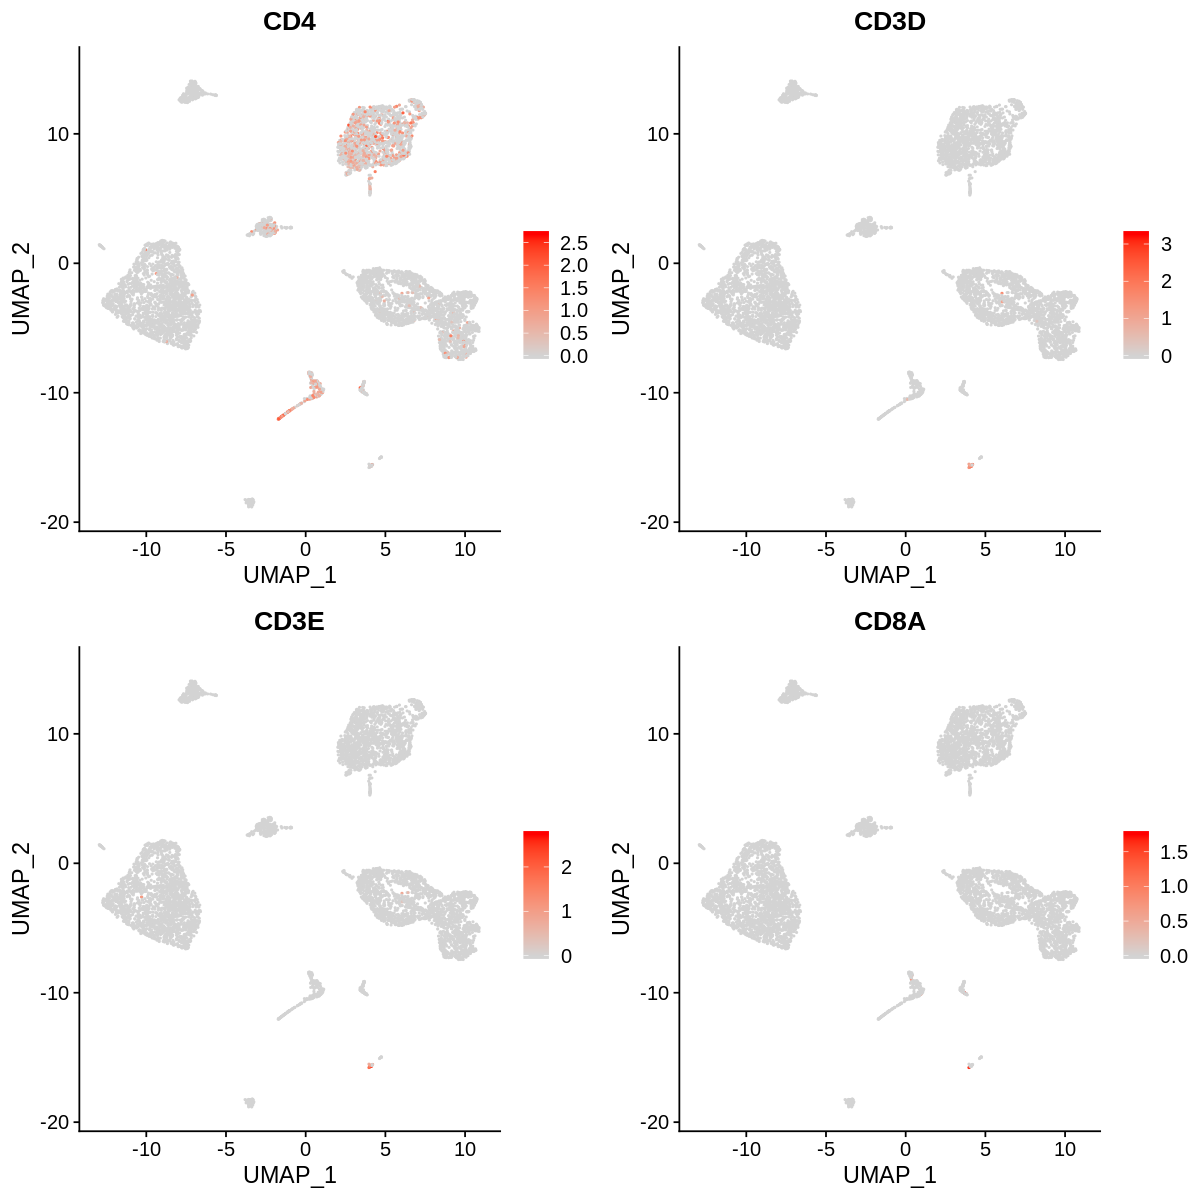

In [19]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

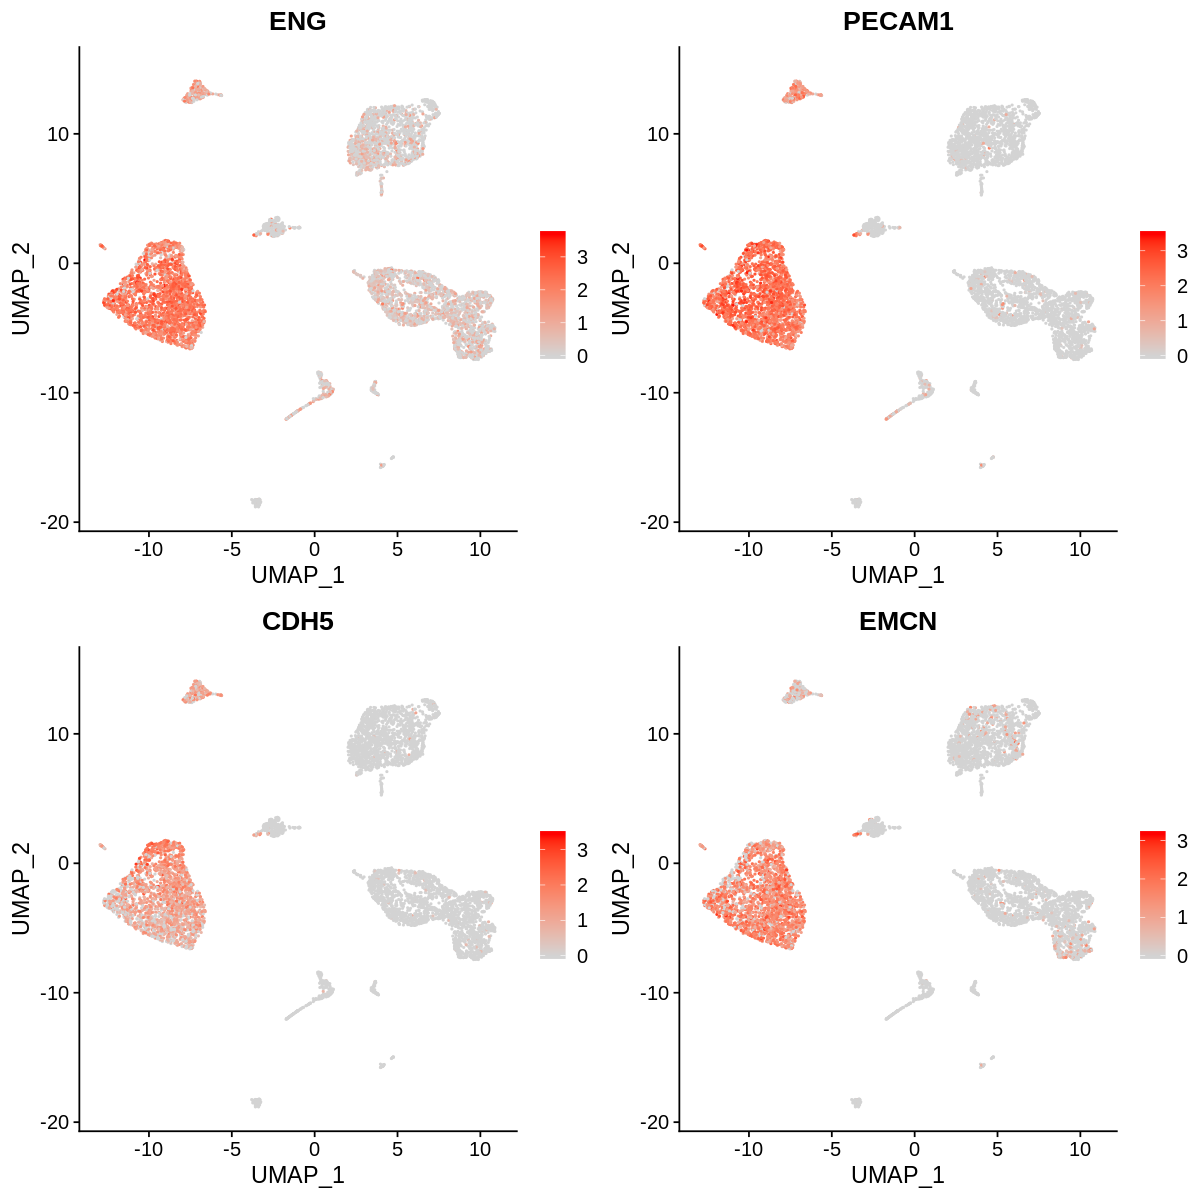

In [20]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

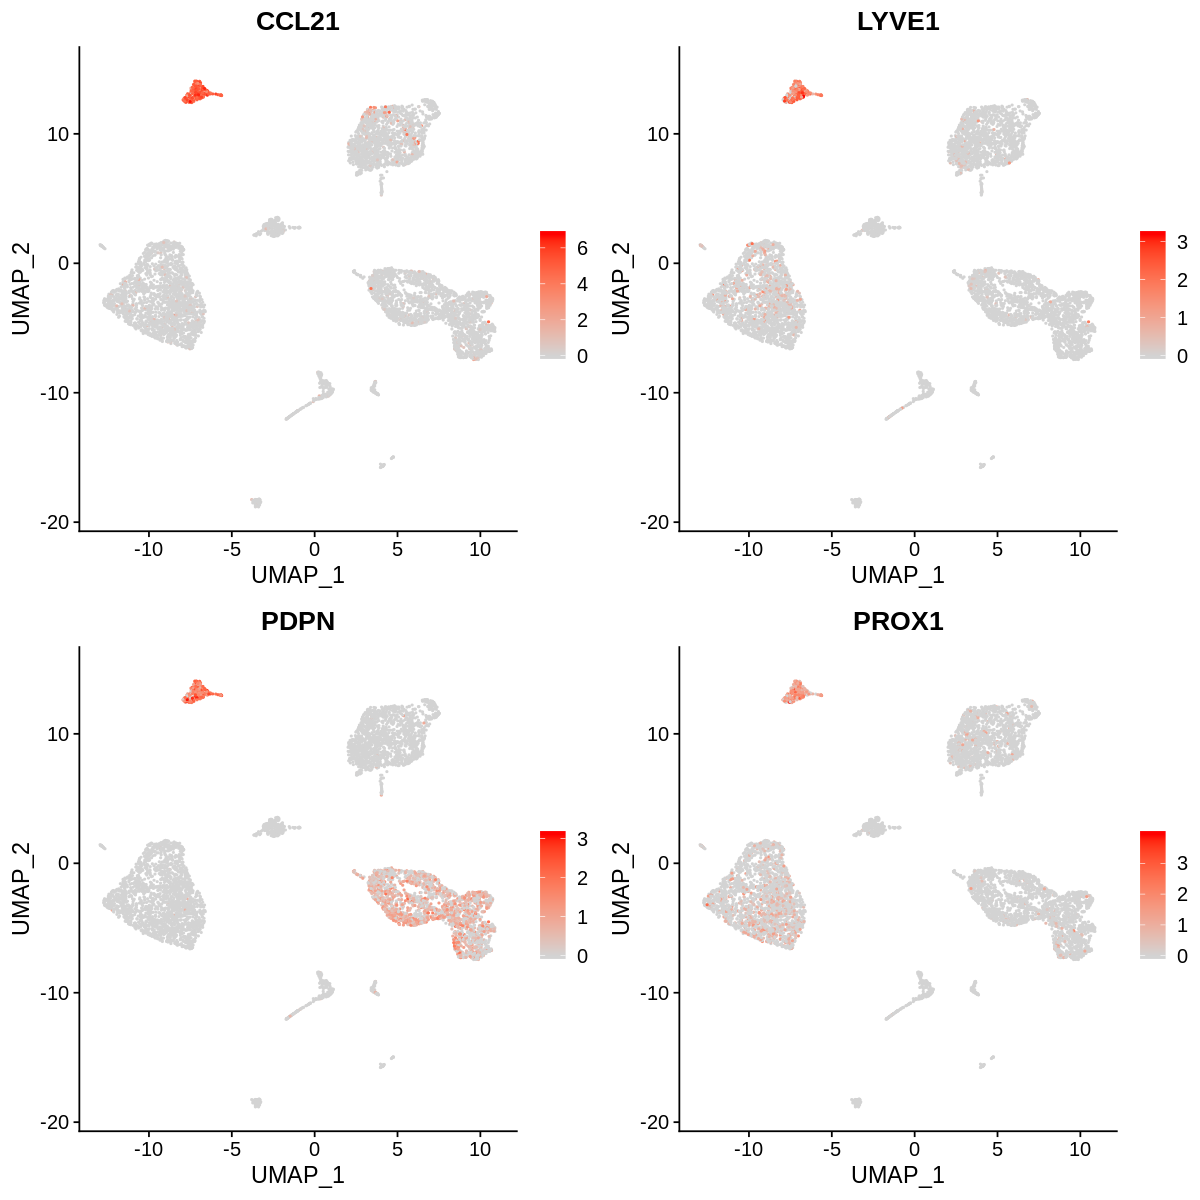

In [21]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

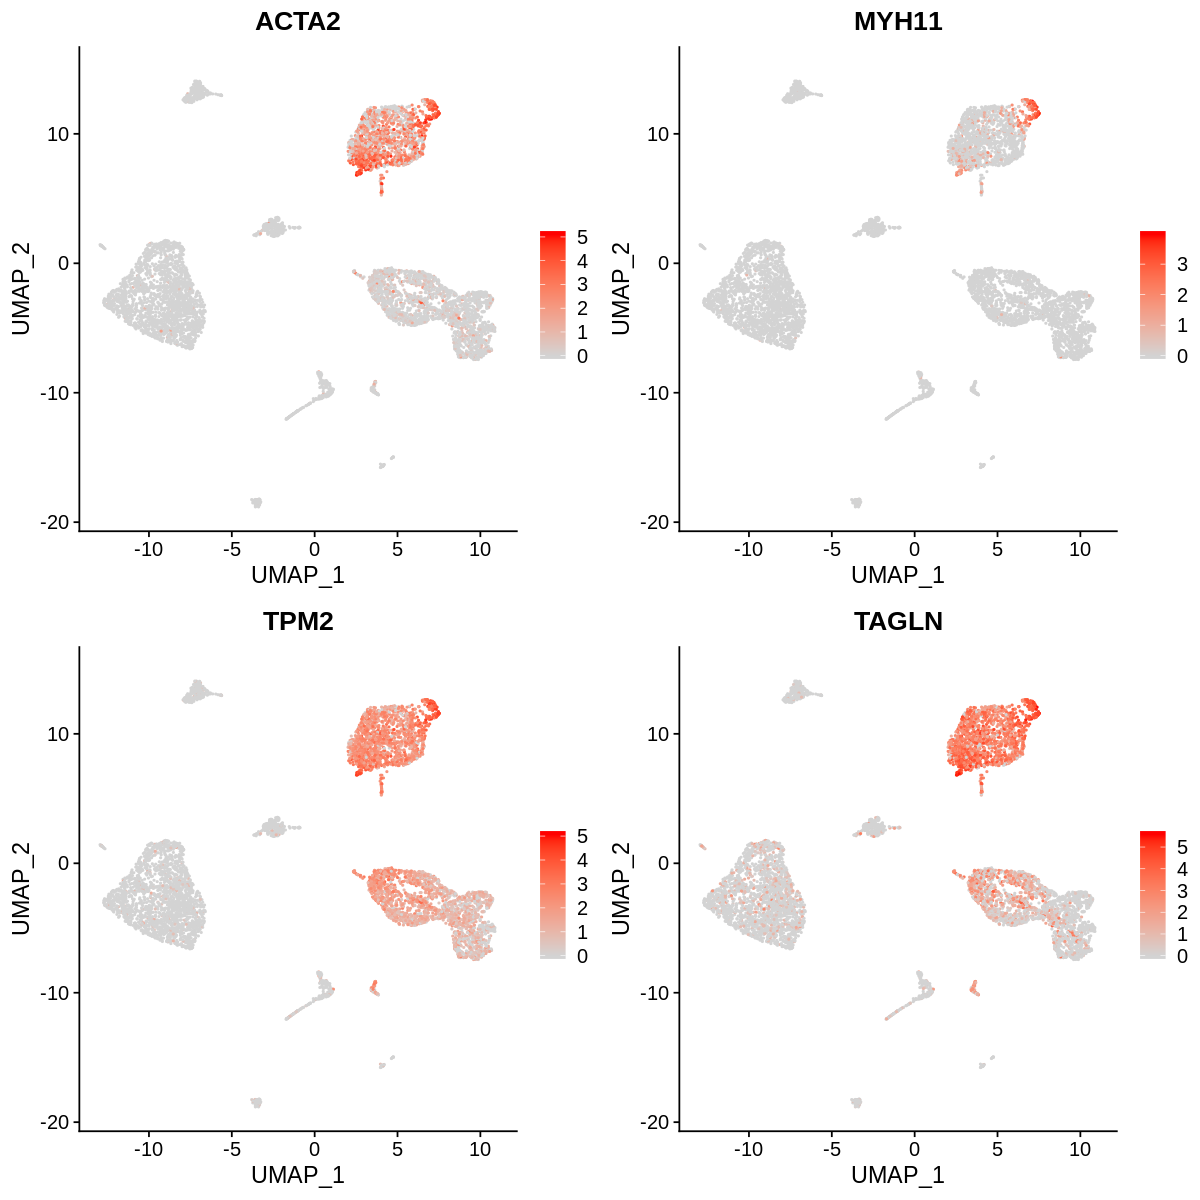

In [22]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF3, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

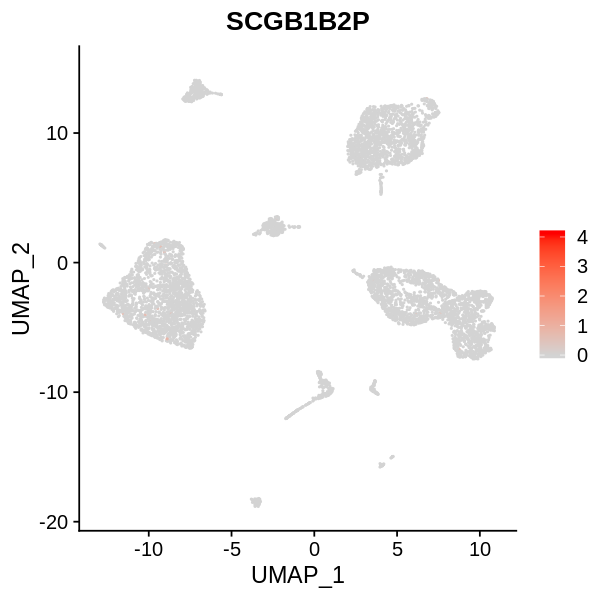

In [23]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(KF3, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

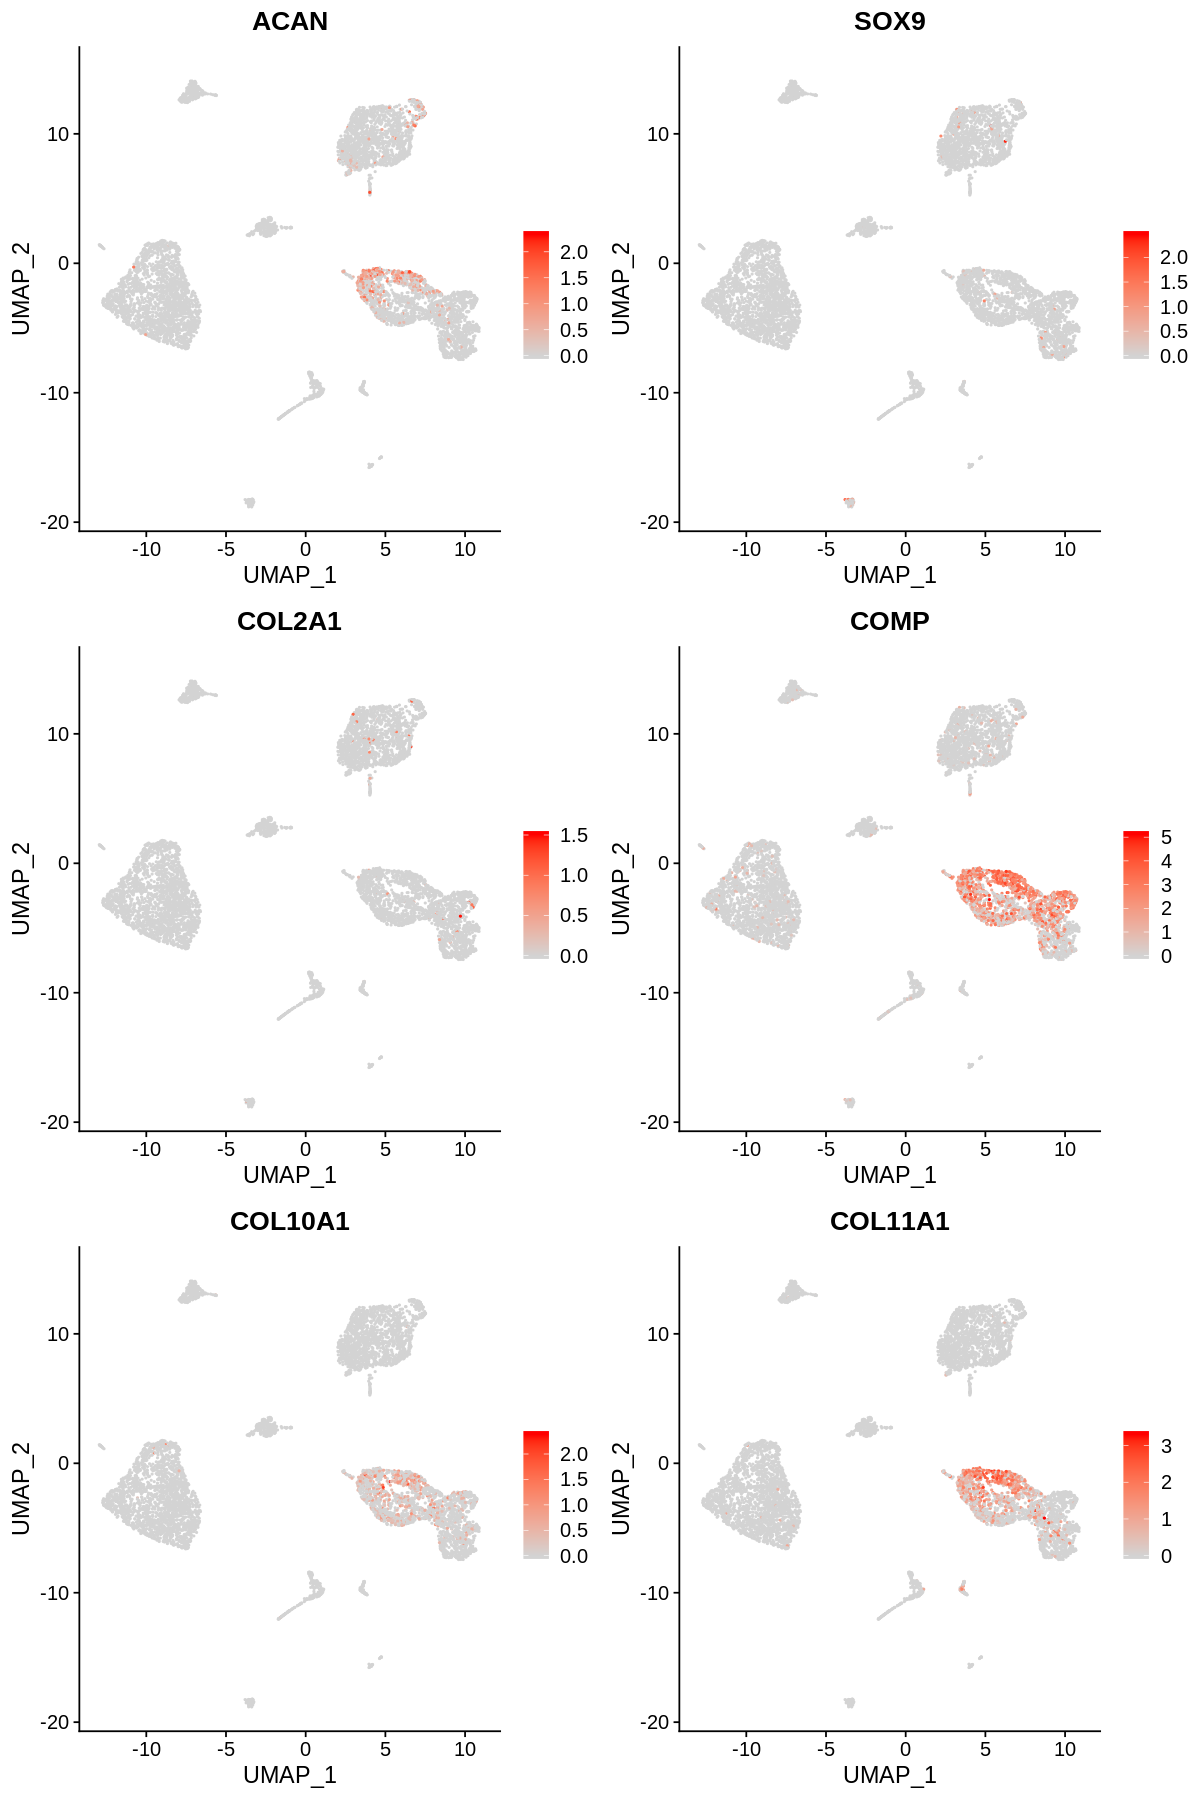

In [24]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(KF3, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [25]:
dim(KF3)
KF3$dataset=rep("KF3",ncol(KF3))

[1] 21192  6717

In [26]:
table(Idents(KF3))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1404 1195  805  506  494  456  421  385  232  226  221   97   90   77   71   37 

In [27]:
KF3.fib=subset(KF3,idents = c("2","4","6","7"))

In [28]:
KF3.fib

An object of class Seurat 
21192 features across 2105 samples within 1 assay 
Active assay: RNA (21192 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [29]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/KF3")

In [30]:
save(KF3,file="KF3.seurat.object.Rdata")

In [31]:
save(KF3.fibbbb,file="KF3.fib.seurat.object.Rdata")

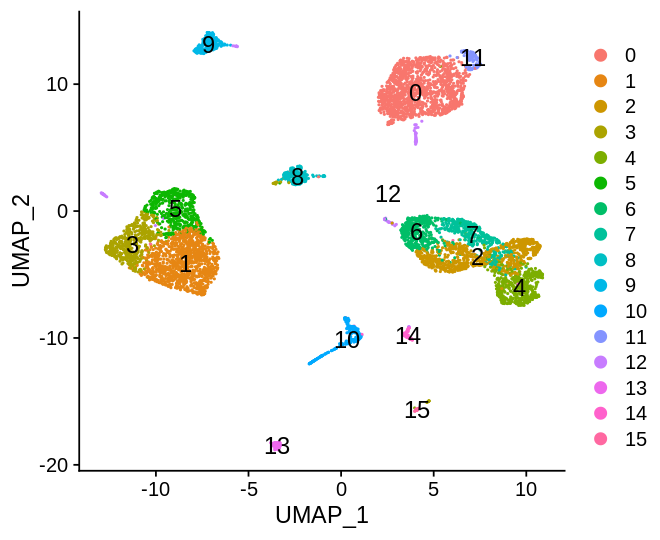

In [32]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(KF3, reduction = "umap",label = T,label.size = 5)

In [33]:
new.cluster.id=c("muscle_fiber","Endothelial","Fibroblast","Endothelial","Fibroblast","Endothelial","Fibroblast","Fibroblast","Immune_cell","Lymphatic_endothelial","Immune_cell","muscle_fiber","Unknown","Keratinocyte","Unknown","Immune_cell")
names(new.cluster.id)=levels(KF3)
KF3=RenameIdents(KF3,new.cluster.id)

In [34]:
table(Idents(KF3))


         muscle_fiber           Endothelial            Fibroblast 
                 1501                  2157                  2105 
          Immune_cell Lymphatic_endothelial               Unknown 
                  490                   226                   161 
         Keratinocyte 
                   77 

In [35]:
write.csv(table(Idents(KF3)),"KF3.cluster_cellType_Statis.csv")

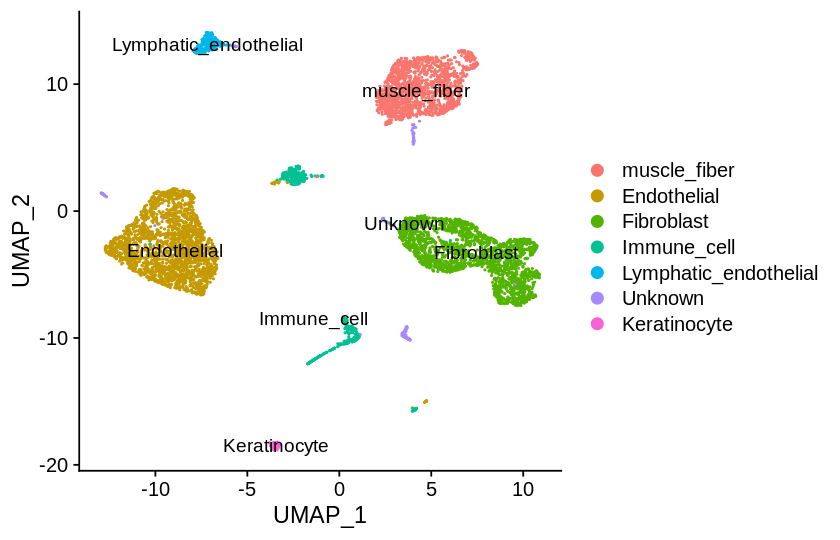

In [37]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(KF3, reduction = "umap",label = T,label.size = 4)